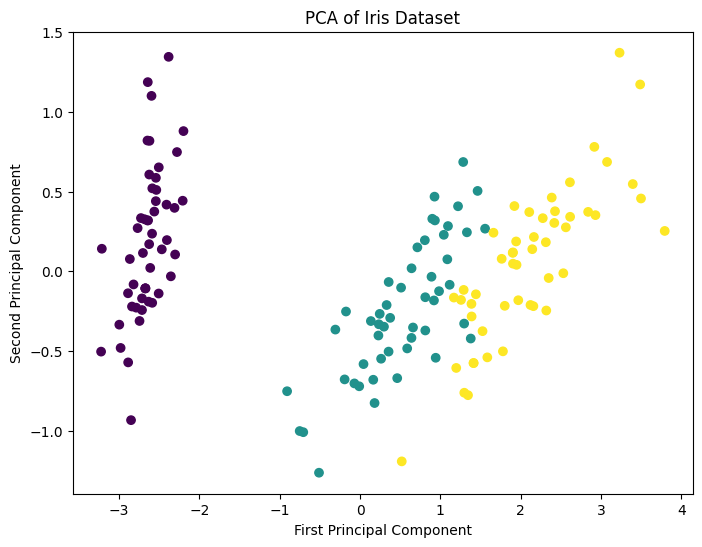

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Iris dataset from CSV file
# Assuming the CSV file is named 'iris_dataset.csv'
df = pd.read_csv('Iris.csv')

# Separate features and labels
X = df.drop(["Id", "Species"], axis=1)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
#  [:, 0] and [:, 1] refer to the first and second principal components, respectively.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Species"].astype("category").cat.codes, cmap="viridis")
plt.title("PCA of Iris Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()


In [ ]:
import numpy as np
from scipy import stats

data = np.array([115.3,195.5, 120.5, 110.2, 90.4, 105.6, 110.9, 116.3, 122.3, 125.4])

mean1 = np.mean(data)

median1 = np.median(data)

stdDev = np.std(data)

variance = np.var(data)

mode = stats.mode(data)
#modeR = mode + modeR[0] if mode.count[0] > 1 else "No mode"

minVal = np.min(data)
maxVal = np.max(data)
normalR = (data - minVal) / (maxVal - minVal)

z_score = (data-mean1)/stdDev

print("mean: " , mean1)
print("median: ", median1)
print("modeR: ", mode)
print("stdDev: ", stdDev)
print("variance: ",variance)
print("normalR: ", normalR)
print("z_score: ", z_score)

mean:  121.24000000000001
median:  115.8
modeR:  ModeResult(mode=90.4, count=1)
stdDev:  26.490987146574962
variance:  701.7724
normalR:  [0.23691722 1.         0.28639391 0.18839201 0.         0.14462417
 0.19505233 0.24643197 0.30352046 0.33301618]
z_score:  [-0.2242272   2.80321755 -0.02793403 -0.41674551 -1.16416953 -0.59038948
 -0.39032143 -0.18647852  0.04001361  0.15703454]


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

X = np.array([
    [5.9, 3.2],
    [4.6, 2.9],
    [6.2, 2.8],
    [4.7, 3.2],
    [5.5, 4.2],
    [5.0, 3.0],
    [4.9, 3.1],
    [6.7, 3.1],
    [5.1, 3.8],
    [6.0, 3.0]
])

initial_centers = np.array([
    [6.2, 3.2],
    [6.6, 3.7],
    [6.5, 3.0]
])

kmeans = KMeans(n_clusters=3, init=initial_centers, n_init=1, random_state=0)

kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_

num_iterations = kmeans.n_iter_

print("Final cluster centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: {center}")

print(f"Number of iterations to converge: {num_iterations}")


Final cluster centers:
Cluster 1: [4.8  3.05]
Cluster 2: [5.3 4. ]
Cluster 3: [6.2   3.025]
Number of iterations to converge: 3


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Assuming X is the dataset, and centers are the initial cluster centers
X = np.array([
    [5, 3.2],
    [4.6, 2.9],
    [6.2, 2.8],
    [7, 3.2],
    [5.5, 4.2],
    [5.0, 3.0],
    [4, 3.1],
    [7, 3.1],
    [1, 3.8],
    [6.0, 3.0]
])

initial_centers = np.array([
    [6.2, 3.2],
    [6.6, 3.7],
    [6.5, 3.0]
])

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, init=initial_centers, n_init=1, random_state=0)
kmeans.fit(X)

# Retrieve the cluster centers and number of iterations
cluster_centers = kmeans.cluster_centers_
iterations = kmeans.n_iter_

# Print results
print("Cluster Centers:")
print("Red Cluster (iteration 1):", np.round(cluster_centers[0], 3))
print("Green Cluster (iteration 2):", np.round(cluster_centers[1], 3))
print("Blue Cluster (converged):", np.round(cluster_centers[2], 3))
print("Number of iterations:", iterations)


Cluster Centers:
Red Cluster (iteration 1): [3.92 3.2 ]
Green Cluster (iteration 2): [5.5 4.2]
Blue Cluster (converged): [6.55  3.025]
Number of iterations: 3


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load datasets
class_data = pd.read_csv('class.csv')
zoo_data = pd.read_csv('zoo.csv')

# Merge datasets on the 'class_type' column
merged_data = pd.merge(zoo_data, class_data, how='inner', left_on='class_type', right_on='Class_Number')

# Select relevant features and target
X = merged_data[['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']]
y = merged_data['Class_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a decision tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_classifier.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
# class_report = classification_report(y_test, y_pred, target_names=class_data['Class_Type'].values)
# print("Classification Report:")
# print(class_report)
# Generate classification report with zero_division parameter
class_report = classification_report(y_test, y_pred, target_names=class_data['Class_Type'].values, zero_division=1)
print("Classification Report:")
print(class_report)


print(merged_data)



Confusion Matrix:
[[ 1  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0 10  0]
 [ 1  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

      Mammal       0.50      1.00      0.67         1
        Bird       1.00      1.00      1.00         3
     Reptile       1.00      1.00      1.00         1
        Fish       1.00      1.00      1.00         2
   Amphibian       1.00      1.00      1.00         3
         Bug       1.00      1.00      1.00        10
Invertebrate       1.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.93      0.86      0.81        21
weighted avg       0.98      0.95      0.94        21

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0    

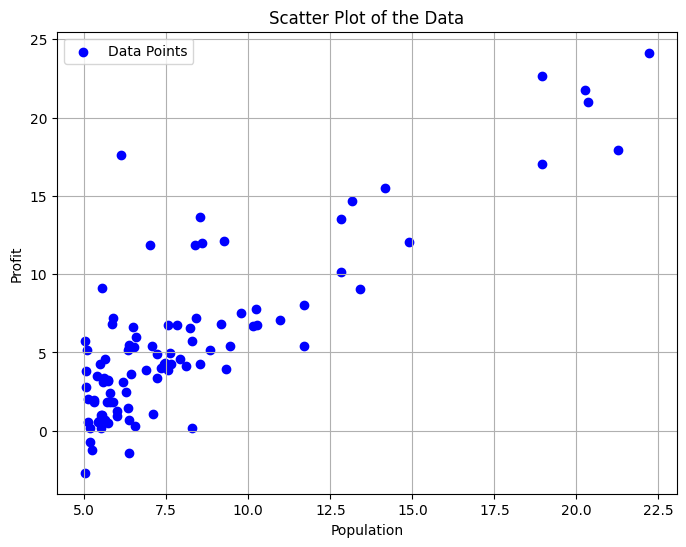

Correlation Matrix:
[[1.         0.83787323]
 [0.83787323 1.        ]]
Linear Regression Parameters:
Slope (m): 1.1930336441895943
Intercept (b): -3.8957808783118573
SSE: 868.5324469391846
SSR: 2046.3146047180423
SST: 2914.8470516572247
R-squared (R2): 0.7020315537841397
Cost (MSE): 8.953942751950358


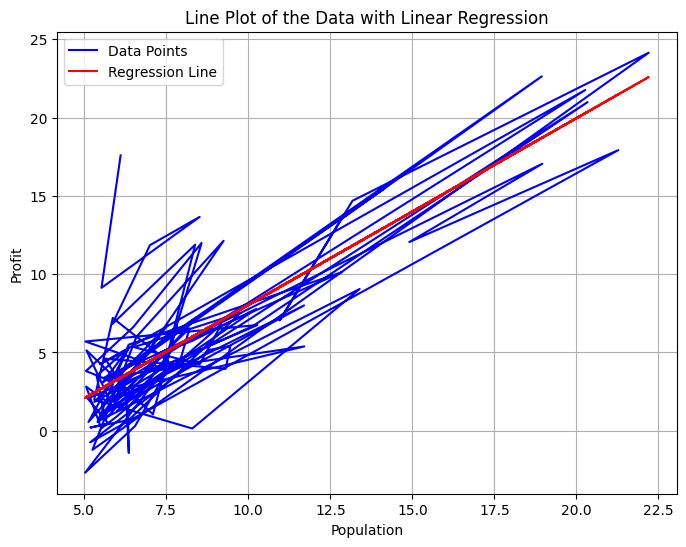

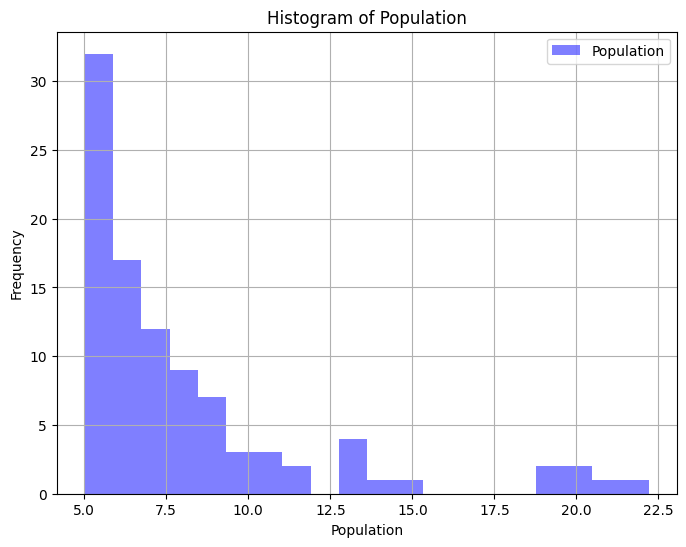

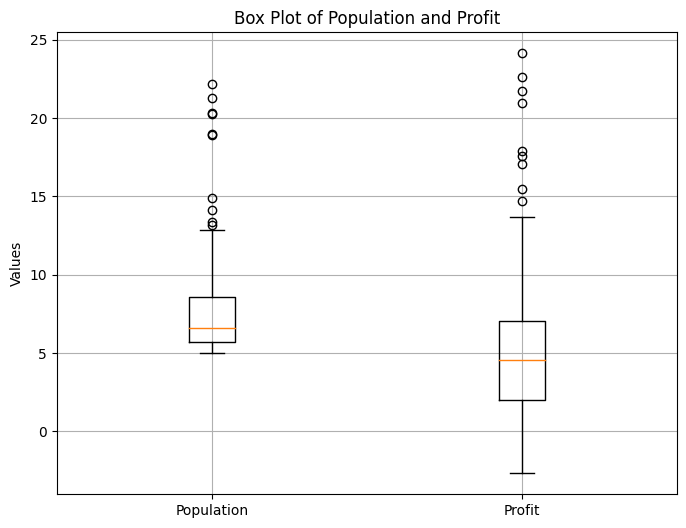

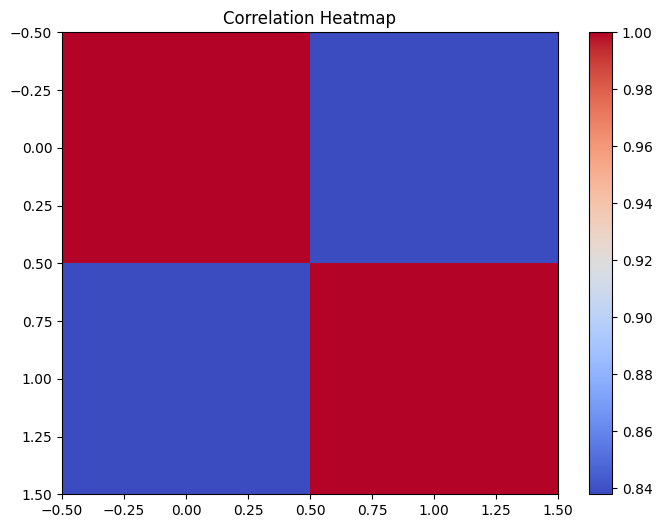

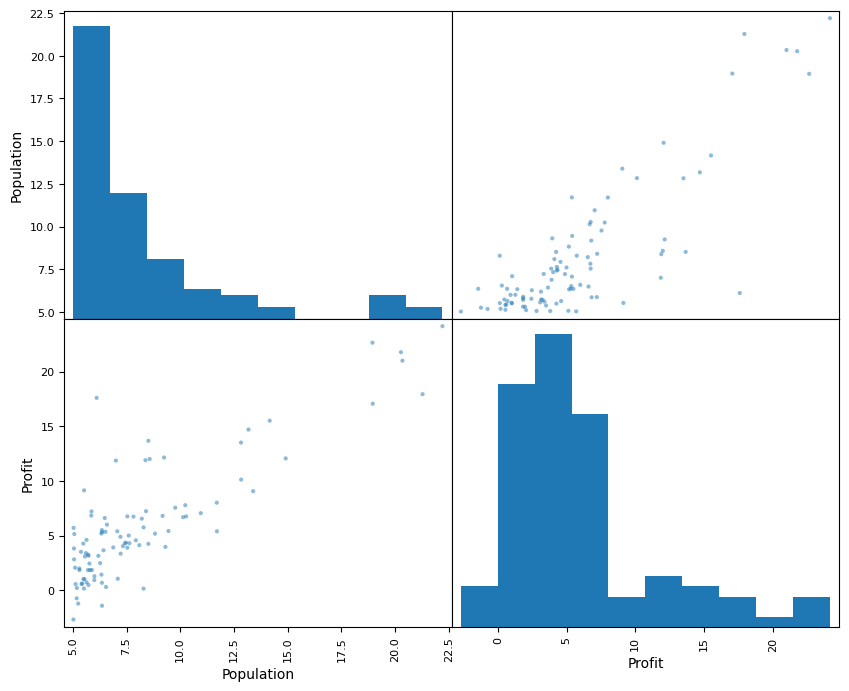

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
data = pd.read_csv("Foodtruck.csv")

# Extract the X and y data
X = data['Population'].values
y = data['Profit'].values

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, c='b', label='Data Points')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Scatter Plot of the Data')
plt.legend()
plt.grid(True)
plt.show()

# Compute the correlation matrix
correlation_matrix = np.corrcoef(X, y)
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate the coefficients of the linear regression
X_mean, y_mean = np.mean(X), np.mean(y)
numerator, denominator = 0, 0
for i in range(len(X)):
    numerator += (X[i] - X_mean) * (y[i] - y_mean)
    denominator += (X[i] - X_mean) ** 2

slope = numerator / denominator
intercept = y_mean - slope * X_mean
print("Linear Regression Parameters:")
print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

# Predicted values
y_pred = slope * X + intercept

# Residuals
residuals = y - y_pred

# Calculate the Sum of Squared Errors (SSE)
SSE = np.sum(residuals**2)

# Calculate the Sum of Squares Regression (SSR)
SSR = np.sum((y_pred - y_mean)**2)

# Calculate the Total Sum of Squares (SST)
SST = np.sum((y - y_mean)**2)

# Calculate the Coefficient of Determination (R-squared)
R2 = 1 - (SSE / SST)

# Calculate the Cost (mean squared error)
Cost = SSE / len(X)

print("SSE:", SSE)
print("SSR:", SSR)
print("SST:", SST)
print("R-squared (R2):", R2)
print("Cost (MSE):", Cost)

plt.figure(figsize=(8, 6))
plt.plot(X, y, 'b-', label='Data Points')
plt.plot(X, y_pred, 'r-', label='Regression Line')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Line Plot of the Data with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(X, bins=20, color='b', alpha=0.5, label='Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram of Population')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot([X, y], labels=['Population', 'Profit'])
plt.ylabel('Values')
plt.title('Box Plot of Population and Profit')
plt.grid(True)
plt.show()

correlation_matrix = np.corrcoef(data.to_numpy(), rowvar=False)
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.show()

from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(10, 8))
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Read the CSV file into a DataFrame
df = pd.read_csv('Student-University.csv', header=None, names=['Feature1', 'Feature2', 'Label'])

# Split the data into features and labels
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocessing: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Perform logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Compute the regression parameters
coefficients = model.coef_
intercept = model.intercept_

# Illustrate the gradient descent method
# Since scikit-learn's LogisticRegression uses the Limited-memory Broyden–Fletcher–Goldfarb–Shanno (LBFGS) algorithm by default,
# we don't need to explicitly illustrate the gradient descent method here.

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


FileNotFoundError: [Errno 2] No such file or directory: 'Student-University.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Read the CSV file into a DataFrame
df = pd.read_csv('Student-University.csv', header=None, names=['Feature1', 'Feature2', 'Label'])

# Display the original dataset
print("Original Dataset:")
print(df)

# Handling noise, NaNs, and missing value imputation
# In this example, we assume there is no noise, NaNs, or missing values in the dataset.

# Split the data into features (X) and labels (y)
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform logistic regression using gradient descent
lr_model = LogisticRegression(multi_class='ovr', solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

# Display the results
print("\nLogistic Regression Parameters:")
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)

# Compute accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy on the Test Set:", accuracy)


Original Dataset:
     Feature1   Feature2  Label
0   34.623660  78.024693      0
1   30.286711  43.894998      0
2   35.847409  72.902198      0
3   60.182599  86.308552      1
4   79.032736  75.344376      1
..        ...        ...    ...
95  83.489163  48.380286      1
96  42.261701  87.103851      1
97  99.315009  68.775409      1
98  55.340018  64.931938      1
99  74.775893  89.529813      1

[100 rows x 3 columns]

Logistic Regression Parameters:
Coefficients: [[2.31939061 1.96978611]]
Intercept: [0.96839164]

Accuracy on the Test Set: 0.8


Accuracy: 0.7701149425287356
Precision: 0.7691516996790829
Recall: 0.7701149425287356
F1 Score: 0.7600376175859775


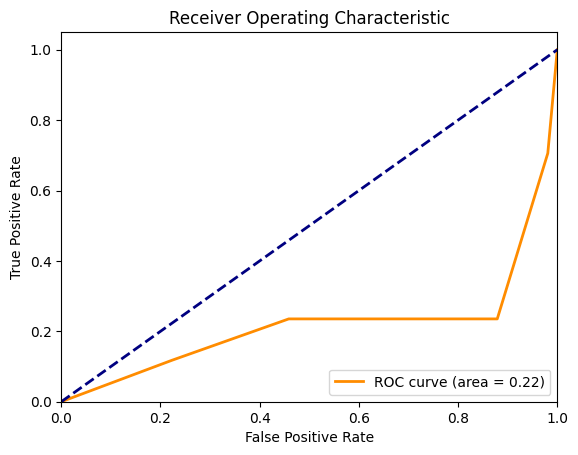

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

data = pd.read_csv('data_vowel_bayes.csv')  # Replace with the actual COVID dataset

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Specify the 'average' parameter
recall = recall_score(y_test, y_pred, average='weighted')  # Specify the 'average' parameter
f1 = f1_score(y_test, y_pred, average='weighted')  # Specify the 'average' parameter

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# For ROC curve, you may need to use one-hot encoding for multiclass problems
# Here is a simple example for binary classification
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your dataset is comma-separated
data = pd.read_csv('data_vowel_bayes.csv', header=None, names=["Feature_1", "Feature_2", "Feature_3", "Label"])

# Split features (X) and labels (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into a training set and a test set (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Specify 'average' parameter for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted')  # You can try other options like 'micro', 'macro', or 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.76
Precision: 0.7573276583360617
Recall: 0.76
F1 Score: 0.7539085607688027


ValueError: multiclass format is not supported

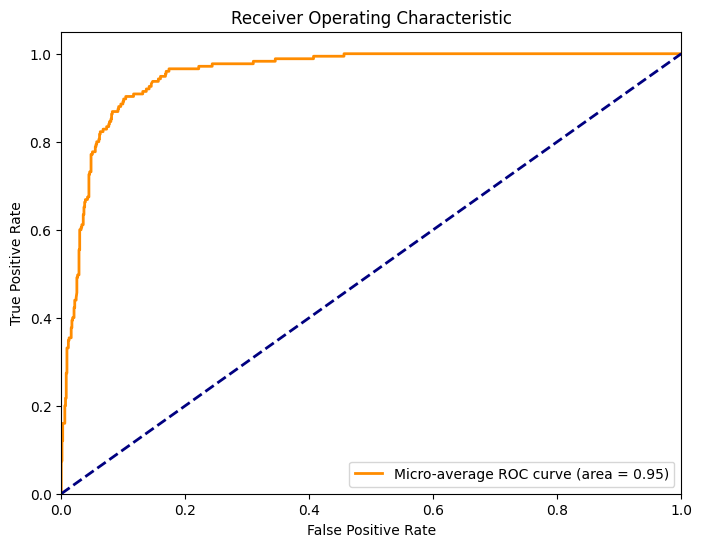

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming your dataset is comma-separated
data = pd.read_csv('data_vowel_bayes.csv', header=None, names=["Feature_1", "Feature_2", "Feature_3", "Label"])

# Split features (X) and labels (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Binarize the output
y = label_binarize(y, classes=np.unique(y))

# Split the data into a training set and a test set (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
classifier = OneVsRestClassifier(GaussianNB())
classifier.fit(X_train, y_train)

# Predict probabilities
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=2, label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from CSV
df = pd.read_csv('lung_cancer_dataset.csv')

# Convert categorical features to numerical
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

# Handling missing values (you may need a more sophisticated approach)
df.fillna(0, inplace=True)

# Separate features and target variable
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate performance
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

# Compare other metrics
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Decision Tree Accuracy: 0.967741935483871
Random Forest Accuracy: 0.967741935483871

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset from CSV
df = pd.read_csv('lung_cancer_dataset.csv')

# Convert categorical features to numerical
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

# Separate features and target variable
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = make_pipeline(SimpleImputer(strategy='mean'), DecisionTreeClassifier(random_state=42))
dt_classifier.fit(X_train, y_train)

# Create a Random Forest classifier
rf_classifier = make_pipeline(SimpleImputer(strategy='mean'), RandomForestClassifier(random_state=42))
rf_classifier.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate performance
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

# Compare other metrics
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# Print feature importance for Random Forest
if hasattr(rf_classifier.named_steps['randomforestclassifier'], 'feature_importances_'):
    feature_importance = pd.DataFrame(rf_classifier.named_steps['randomforestclassifier'].feature_importances_,
                                       index=X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    print("\nRandom Forest Feature Importance:\n", feature_importance)


Decision Tree Accuracy: 0.967741935483871
Random Forest Accuracy: 0.967741935483871

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


Random Forest Feature Importance:
                        importance
AGE                      0.195391
ALCOHOL CONSUMING        0.089787
ALLERGY                  0.078781
PEER_PRESSUR

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix

# Load the dataset
data = pd.read_csv("heart.csv")

# Separate the data
x = data.drop('target', axis=1)
y = data.target

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)

# Create SVM classifiers with different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    print(f"\nKernel: {kernel}")

    # Create a SVM Classifier
    ml = svm.SVC(kernel=kernel)

    # Train the model using the training sets
    ml.fit(x_train, y_train)

    # Predict the response for the test dataset
    y_pred = ml.predict(x_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))

    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    print('False Positives\n {}'.format(FP))
    print('False Negatives\n {}'.format(FN))
    print('True Positives\n {}'.format(TP))
    print('True Negatives\n {}'.format(TN))
    TPR = TP / (TP + FN)
    print('Sensitivity \n {}'.format(TPR))
    TNR = TN / (TN + FP)
    print('Specificity \n {}'.format(TNR))
    Precision = TP / (TP + FP)
    print('Precision \n {}'.format(Precision))
    Recall = TP / (TP + FN)
    print('Recall \n {}'.format(Recall))
    Acc = (TP + TN) / (TP + TN + FP + FN)
    print('Accuracy \n{}'.format(Acc))
    Fscore = 2 * (Precision * Recall) / (Precision + Recall)
    print('FScore \n{}'.format(Fscore))



Kernel: linear
 124  26
  13 145
False Positives
 [13 26]
False Negatives
 [26 13]
True Positives
 [124 145]
True Negatives
 [145 124]
Sensitivity 
 [0.82666667 0.91772152]
Specificity 
 [0.91772152 0.82666667]
Precision 
 [0.90510949 0.84795322]
Recall 
 [0.82666667 0.91772152]
Accuracy 
[0.87337662 0.87337662]
FScore 
[0.8641115  0.88145897]

Kernel: rbf
 108  42
  46 112
False Positives
 [46 42]
False Negatives
 [42 46]
True Positives
 [108 112]
True Negatives
 [112 108]
Sensitivity 
 [0.72       0.70886076]
Specificity 
 [0.70886076 0.72      ]
Precision 
 [0.7012987  0.72727273]
Recall 
 [0.72       0.70886076]
Accuracy 
[0.71428571 0.71428571]
FScore 
[0.71052632 0.71794872]

Kernel: poly
 107  43
  46 112
False Positives
 [46 43]
False Negatives
 [43 46]
True Positives
 [107 112]
True Negatives
 [112 107]
Sensitivity 
 [0.71333333 0.70886076]
Specificity 
 [0.70886076 0.71333333]
Precision 
 [0.69934641 0.72258065]
Recall 
 [0.71333333 0.70886076]
Accuracy 
[0.71103896 0.711038